In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm


#auctions = pd.read_csv('C:/roberto/auctions.csv.gzip', compression = 'gzip', low_memory=False, dtype= {'auctions_type_id' : 'object','country' : 'category','date' : 'object','decide_id' : 'category','platform' : 'category', 'ref_type_id': 'category','source_id': 'category'})
#auctions = pd.read_csv('data\auctions.csv.gzip', compression = 'gzip', low_memory=False) 
#, dtype= {'country' : 'category' ,'device_id' : 'category', 'platform':'category', 'ref_type_id':'category','source_id':'category'})
#clicks = pd.read_csv('data\clicks.csv.gzip',compression = 'gzip')
events = pd.read_csv('data\events.csv.gzip',compression = 'gzip',low_memory=False, dtype = 'object')
#installs = pd.read_csv('data\installs_train.csv', dtype= {'device_countrycode' : 'category','device_brand' : 'category','device_model' : 'category','session_user_agent' : 'category','user_agent' : 'category', 'device_language': 'category','kind': 'category','wifi': 'category','trans_id': 'category', 'ref_type': 'category'})
#target = pd.read_csv("C:/roberto/target_competencia.csv", dtype= {'index' : 'int16' ,'ref_hash' : 'int64','obj_Sc' : 'int16','obj_St' : 'int16'  })




### Cantidad de Registros 

In [15]:
events.shape

(2494423, 22)

### Evaluando valores nulos

In [90]:
events_nulos = events.isnull().sum()
events_nulos = pd.DataFrame({'columnas': events_nulos.index.values, "nulos": events_nulos}).reset_index(drop = True)
events_nulos

,columnas,nulos
0,date,0
1,event_id,0
2,ref_type,0
3,ref_hash,0
4,application_id,0
5,attributed,0
6,device_countrycode,0
7,device_os_version,1472357
8,device_brand,1329460
9,device_model,87967


### Revisando la cantidad de elementos por columnas

In [3]:
events.count()

date                  2494423
event_id              2494423
ref_type              2494423
ref_hash              2494423
application_id        2494423
attributed            2494423
device_countrycode    2494423
device_os_version     1022066
device_brand          1164963
device_model          2406456
device_city            614698
session_user_agent    2482637
trans_id                   82
user_agent            1391527
event_uuid            2489324
carrier                616434
kind                  2489324
device_os              657667
wifi                  1378872
connection_type        612463
ip_address            2494423
device_language       2406604
dtype: int64

A partir de columna 'device_os_version' se comienzan a ver columnas con muchos registros nulos a excepción de 'ip_address'

In [22]:
events.describe()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
count,2494423,2494423,2494423,2494423,2494423,2494423,2494423,1022066,1164963,2406456,...,82,1391527,2489324,616434,2489324,657667,1378872,612463,2494423,2406604
unique,2488829,568,2,196049,269,2,1,81,250,2624,...,13,5111,2489324,84,583,4,2,3,285212,186
top,2019-03-12 13:59:31.416,22,1891515180541284343,7823950631004872496,66,False,6333597102633388268,4.3537503246500966e+18,3.083058605577787e+17,2.33194661091417e+18,...,{hash},2.394269162455642e+18,1b04882b-f62b-4f91-afde-b521a2d8188b,2.2481569642543155e+17,5.500848327478996e+18,7.531669329342818e+18,true,Cable/DSL,1992632945768888579,6.977049253562486e+18
freq,3,618228,1882743,2913,325696,2489324,2494423,277691,579861,210697,...,33,42325,1,436983,618217,389811,930902,331948,22640,745898


# Evaluando la cantidad de eventos 'attributed' 

In [16]:
events2 = events[['attributed']].groupby(['attributed']).size().reset_index(name='cuenta')
events2

,attributed,cuenta
0,False,2489324
1,True,5099


## Graficando 

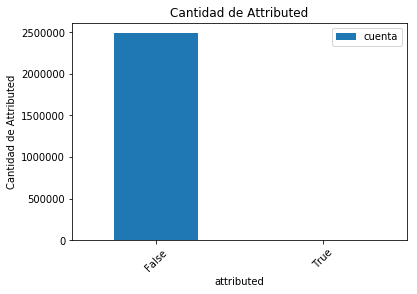

In [17]:
events2.plot(x = 'attributed', rot = 45, kind='bar')
plt.title('Cantidad de Attributed')
plt.xlabel('attributed')
plt.ylabel('Cantidad de Attributed')

La cantidad de *'attributed' == True*, es muy pequeña 

### Explorando el 'event_id' más predominante para cada 'application_id' donde 'attributed' == True

In [85]:
#Top de eventos por 'application_id' donde 'attributed' == True
events_top = events[events['attributed'] == 'True'].groupby(['application_id']).size().reset_index(name='cuenta').sort_values(['cuenta'],ascending=False).reset_index()
events_top[0:7]

,index,application_id,cuenta
0,27,63,2323
1,6,16,1219
2,25,45,431
3,9,170,323
4,0,102,150
5,31,77,135
6,16,244,125


In [91]:
#filtrando las 'application_id' top de eventos

events_top2 = events[(events.application_id == '63') | (events.application_id == '16') | (events.application_id == '45') | (events.application_id == '170') | (events.application_id == '102') | (events.application_id == '77') | (events.application_id == '244')]
events_top3 = events_top2[['attributed', 'event_id','application_id']]

#agrupando y ordenando el top del tipo de evento por 'application_id'
events_top4 = events_top3[events_top3['attributed'] == 'True'].groupby(['application_id','event_id'], group_keys=False).size().reset_index(name='cuenta').sort_values(['application_id','cuenta'],ascending=False).reset_index()
events_top4

,index,application_id,event_id,cuenta
0,35,77,204,100
1,38,77,22,10
2,33,77,103,8
3,40,77,31,7
4,39,77,30,4
5,36,77,205,3
6,37,77,206,2
7,34,77,105,1
8,32,63,31,1253
9,26,63,156,470


In [ ]:
Se puede destacar cual fue el tipo de evento que mas se repitio para las aplicciones top.

### Explorando las el tipo de conexión y las IP

In [18]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.2481569642543155e+17,9.977660181316936e+17,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.2481569642543155e+17,5.516623012570946e+18,7.531669329342818e+18,NaN,Cable/DSL,7858558567428669000,4.077062198952597e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703034097298e+17,NaN,5.990116681709081e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.2481569642543155e+17,8.561152834701074e+18,7.531669329342818e+18,NaN,Cable/DSL,6324037615828123965,4.077062198952597e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391843585977942e+18,NaN,5.960895846746644e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.2481569642543155e+17,8.731901657619553e+17,7.531669329342818e+18,NaN,Cable/DSL,2894495631302821483,3.3013777759776993e+18


In [5]:
#Creando nuevo DF para explorar las conexiones y las IP
conex = events[['date','connection_type', 'ip_address']]

#cambiando el type de las columnas
conex['date'] = pd.to_datetime(conex['date'], format='%Y-%m-%d %H:%M:%S.%f')
conex['connection_type'] = conex['connection_type'].astype('category')
conex['ip_address'] = conex['ip_address'].astype('category')

conex.dtypes

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import s

date               datetime64[ns]
connection_type          category
ip_address               category
dtype: object

In [38]:
#evaluando nulos
conex.count()

date               2494423
connection_type     612463
ip_address         2494423
dtype: int64

El 75% de las 'connection_type' tienen valores nulos, esto hace que la exploración se deba hacer con IP para encontrar cantidad de eventos por IP, lo que nos puede llevar a comportamiento asociados al fraude.

### Se van a evaluar las conexiones IP por día, para entender su comportamiento

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Cantidad de eventos')

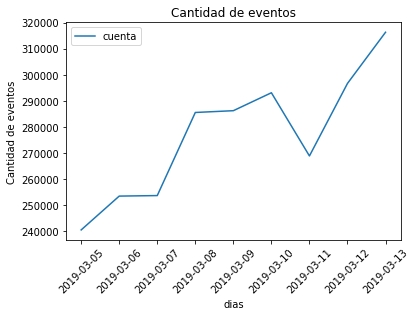

In [92]:
#Se crea un dataset donde se convierte el datetime por date
conex['onlydate'] = conex['date'].dt.date

conex['onlydate'].value_counts().reset_index(name='cuenta').plot(x = 'index', rot = 45, kind='line') 

plt.title('Cantidad de eventos')
plt.xlabel('dias')
plt.ylabel('Cantidad de eventos')

Hay una tendencia a la suba

In [100]:
#Contando la cantidad de eventos por cada IP

ipconx = conex['ip_address'].value_counts().reset_index(name='cuenta') 
ipconx.rename(columns={'index':'ip_address'}).head()

,ip_address,cuenta
0,1992632945768888579,22640
1,3162368506662488065,19379
2,7726314782926052608,17704
3,2394721645995561079,9777
4,589886713227299026,7561
